In [105]:
import pandas as pd
import pickle as pkl
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from multiprocessing import Pool

## Building a graph

In [3]:
with open ('data/drug_target_interactions.pkl', 'rb') as f:
    drug_target_interactions = pkl.load(f)

In [4]:
drug_target_interactions.head()

,drug_cas,drug_id,drug_name,target_actions,target_amino,target_gene,target_id,target_name,target_organism
0,138068-37-8,DB00001,Lepirudin,[inhibitor],>lcl|BSEQ0016004|Prothrombin\nMAHVRGLQLPGCLALA...,>lcl|BSEQ0016005|Prothrombin (F2)\nATGGCGCACGT...,BE0000048,Prothrombin,Human
1,205923-56-4,DB00002,Cetuximab,[antagonist],>lcl|BSEQ0001530|Epidermal growth factor recep...,>lcl|BSEQ0019007|Epidermal growth factor recep...,BE0000767,Epidermal growth factor receptor,Human
2,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0010635|Low affinity immunoglobulin g...,>lcl|BSEQ0010636|Low affinity immunoglobulin g...,BE0000901,Low affinity immunoglobulin gamma Fc region re...,Human
3,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0011518|Complement C1r subcomponent\n...,>lcl|BSEQ0011519|Complement C1r subcomponent (...,BE0002093,Complement C1r subcomponent,Human
4,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0016678|Complement C1q subcomponent s...,>lcl|BSEQ0016679|Complement C1q subcomponent s...,BE0002094,Complement C1q subcomponent subunit A,Human


In [5]:
drug_target_interactions_graph = nx.from_pandas_edgelist(drug_target_interactions[['drug_id', 'target_id']],
                                                         source = 'drug_id', target = 'target_id',
                                                         edge_attr = True)

In [6]:
drug_target_interactions_graph

In [7]:
nx.is_connected(drug_target_interactions_graph)

False

## Seems like the graph is not fully connected. Inspecting smaller connected components

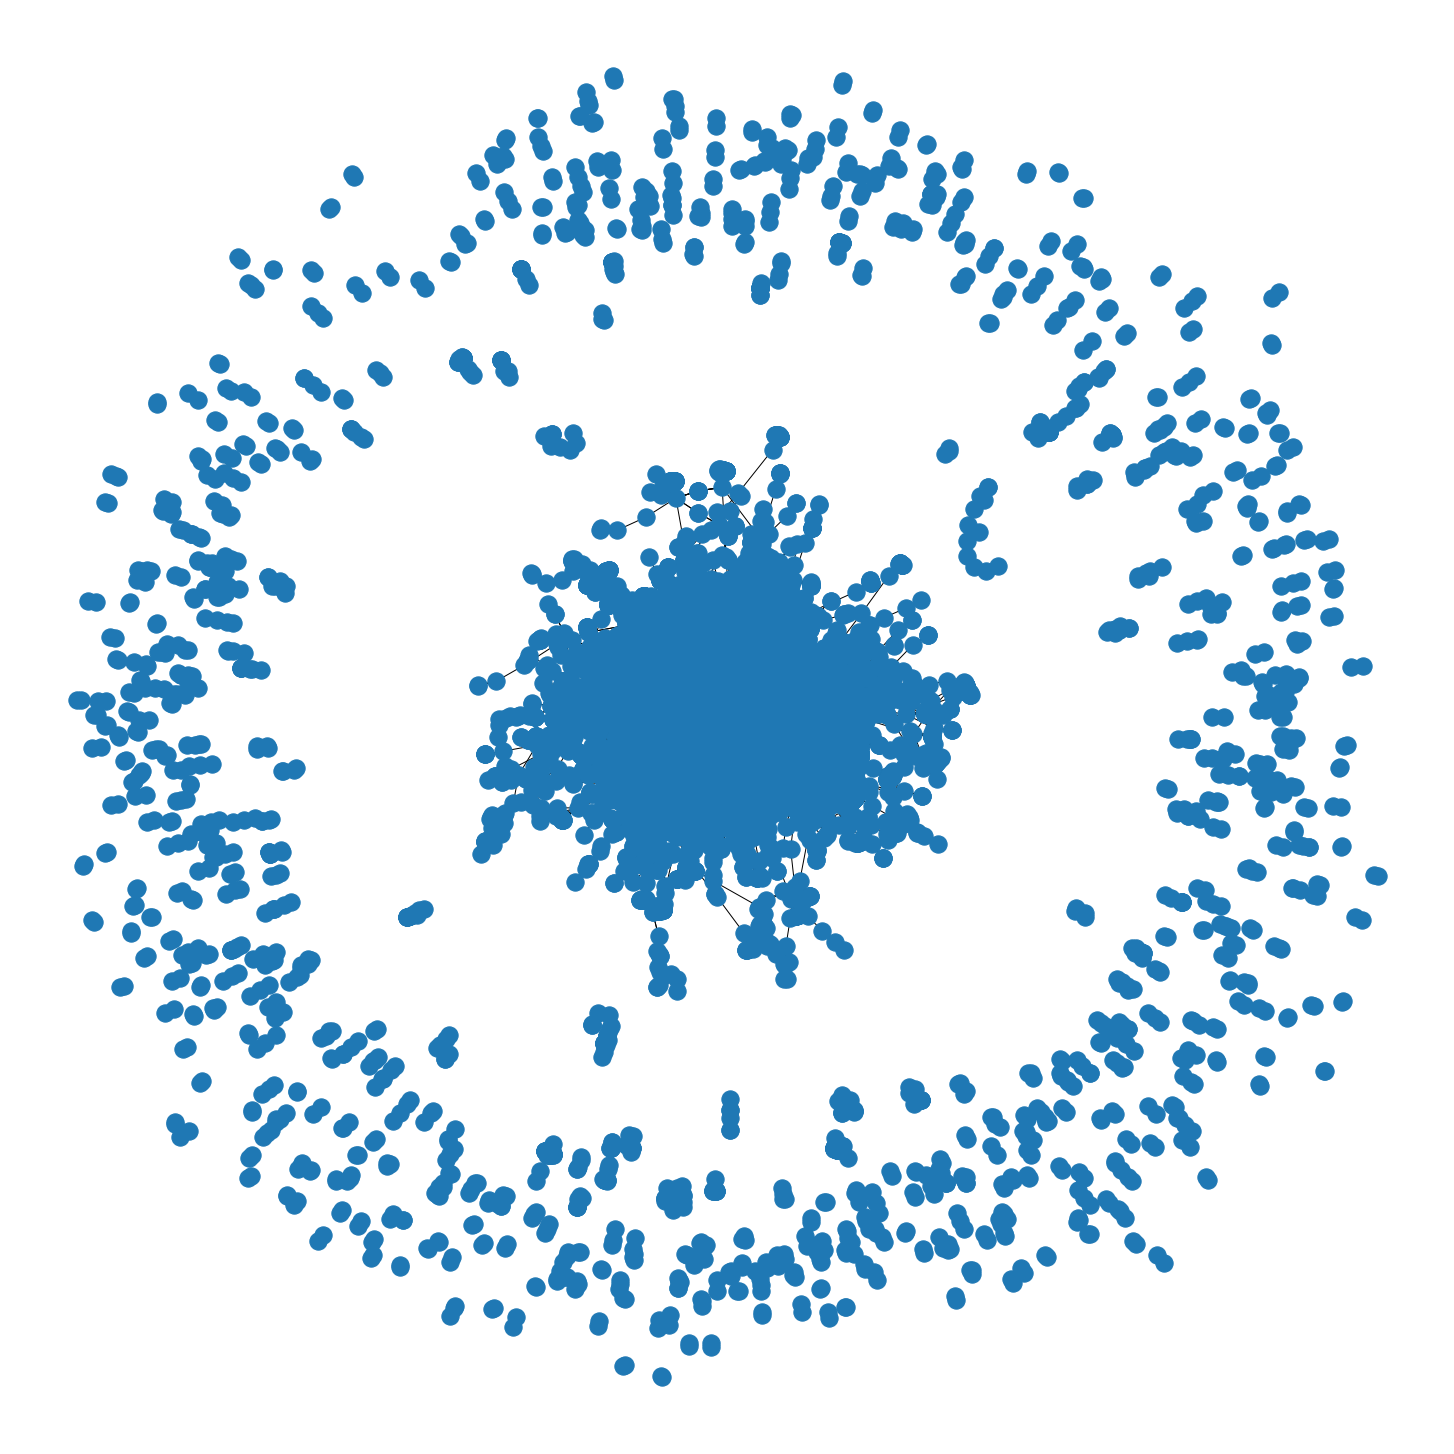

In [48]:
plt.figure(figsize = (20, 20))
nx.draw_spring(drug_target_interactions_graph, node_size = 5)

In [12]:
list(nx.connected_components(drug_target_interactions_graph))

[{'BE0000041',
  'DB07369',
  'DB02511',
  'DB07836',
  'BE0000474',
  'BE0003797',
  'DB08664',
  'DB07859',
  'DB08617',
  'BE0002596',
  'BE0001360',
  'DB00934',
  'DB06838',
  'BE0004311',
  'BE0002127',
  'BE0000542',
  'DB07209',
  'BE0004138',
  'BE0000148',
  'DB01041',
  'BE0002217',
  'DB00162',
  'DB02830',
  'BE0000133',
  'BE0001684',
  'DB00340',
  'DB01919',
  'BE0002678',
  'BE0002473',
  'BE0008705',
  'DB02138',
  'BE0003642',
  'BE0004430',
  'DB04895',
  'BE0001863',
  'BE0001705',
  'DB06267',
  'DB01419',
  'DB06716',
  'DB00617',
  'DB07225',
  'DB05801',
  'DB08215',
  'BE0002391',
  'DB06920',
  'DB00369',
  'BE0004234',
  'BE0000645',
  'BE0001457',
  'BE0003728',
  'DB04379',
  'DB02803',
  'DB02664',
  'DB06663',
  'DB08575',
  'DB06413',
  'BE0004525',
  'BE0003991',
  'BE0002409',
  'DB00690',
  'DB04855',
  'BE0000647',
  'DB04020',
  'BE0001424',
  'DB07155',
  'DB00700',
  'DB03953',
  'BE0000563',
  'DB07023',
  'DB07307',
  'DB03848',
  'DB02433',
  

<BarContainer object of 578 artists>

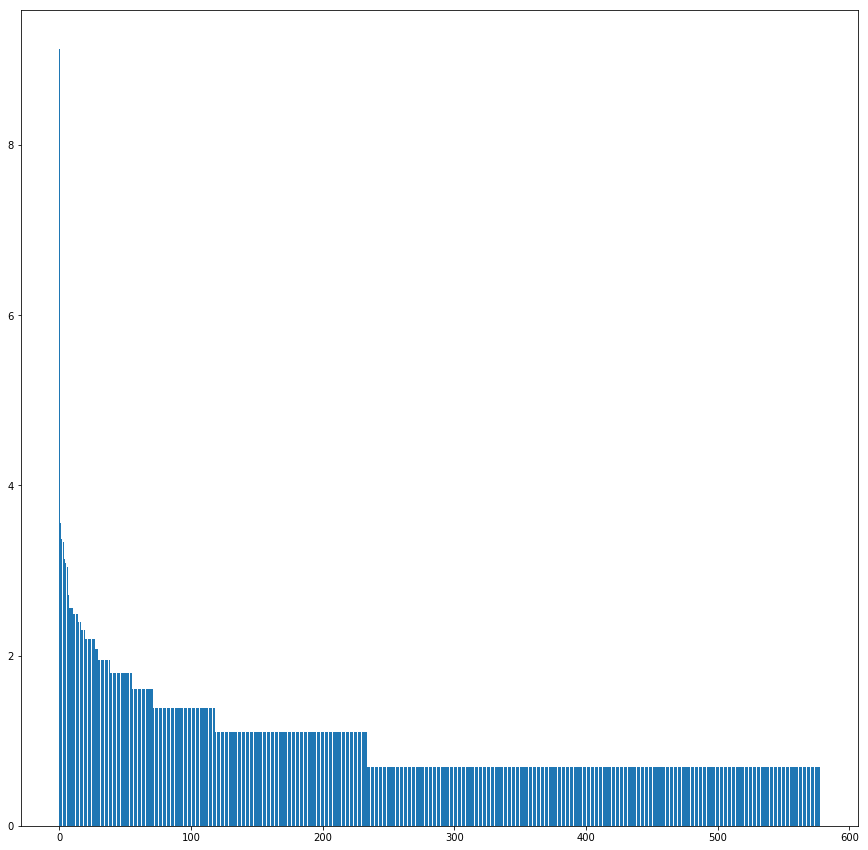

In [13]:
connect_components_list = [len(n) for n in nx.connected_components(drug_target_interactions_graph)]
plt.figure(figsize = (15, 15))
plt.bar(range(len(connect_components_list)), sorted(np.log(connect_components_list), reverse = True))

### Seems like there is one huge component and several smaller components. Taking a look at the largest component first

In [96]:
drug_target_interactions_major = list(nx.connected_component_subgraphs(drug_target_interactions_graph))[0]

In [97]:
nx.is_connected(drug_target_interactions_major)

True

## Converting to NetworkX recommended bipartite format

In [16]:
bottom_nodes, top_nodes = bipartite.sets(drug_target_interactions_major)

In [18]:
[n for n in drug_target_interactions_major.nodes(data=True)]

[('BE0000041', {}),
 ('DB02511', {}),
 ('DB07836', {}),
 ('BE0005841', {}),
 ('DB07369', {}),
 ('BE0003282', {}),
 ('BE0000474', {}),
 ('DB08664', {}),
 ('DB11365', {}),
 ('DB07859', {}),
 ('DB08617', {}),
 ('BE0003585', {}),
 ('BE0002596', {}),
 ('BE0001360', {}),
 ('DB00934', {}),
 ('DB01940', {}),
 ('DB02314', {}),
 ('BE0000717', {}),
 ('DB06838', {}),
 ('BE0004311', {}),
 ('BE0002127', {}),
 ('BE0000542', {}),
 ('DB07209', {}),
 ('BE0004138', {}),
 ('BE0000148', {}),
 ('BE0004207', {}),
 ('BE0001778', {}),
 ('BE0002217', {}),
 ('DB03072', {}),
 ('DB00162', {}),
 ('DB02830', {}),
 ('DB03515', {}),
 ('BE0000133', {}),
 ('DB07870', {}),
 ('DB03148', {}),
 ('DB05241', {}),
 ('DB02802', {}),
 ('DB03931', {}),
 ('BE0001684', {}),
 ('BE0003797', {}),
 ('DB04320', {}),
 ('BE0004452', {}),
 ('DB00340', {}),
 ('BE0008670', {}),
 ('DB00549', {}),
 ('BE0001358', {}),
 ('BE0004120', {}),
 ('BE0000951', {}),
 ('BE0004507', {}),
 ('DB04924', {}),
 ('BE0002678', {}),
 ('DB04293', {}),
 ('DB01764',

In [19]:
drugs_df = drug_target_interactions[['drug_id', 'drug_name', 'drug_cas']].drop_duplicates().set_index('drug_id')
targets_df = drug_target_interactions[['target_id',
                                     'target_amino', 'target_gene',
                                     'target_name']].drop_duplicates().set_index('target_id')



In [20]:
drugs_df['bipartite'] = 0
targets_df['bipartite'] = 1

In [21]:
nodes = drugs_df.to_dict('index')
nodes.update(targets_df.to_dict('index'))

In [22]:
nx.set_node_attributes(drug_target_interactions_major, nodes)

In [23]:
[v for i,v in drug_target_interactions_major.nodes(data = True)]

[{'bipartite': 1,
  'target_amino': '>lcl|BSEQ0036943|Coagulation factor V\nMFPGCPRLWVLVVLGTSWVGWGSQGTEAAQLRQFYVAAQGISWSYRPEPTNSSLNLSVTS\nFKKIVYREYEPYFKKEKPQSTISGLLGPTLYAEVGDIIKVHFKNKADKPLSIHPQGIRYS\nKLSEGASYLDHTFPAEKMDDAVAPGREYTYEWSISEDSGPTHDDPPCLTHIYYSHENLIE\nDFNSGLIGPLLICKKGTLTEGGTQKTFDKQIVLLFAVFDESKSWSQSSSLMYTVNGYVNG\nTMPDITVCAHDHISWHLLGMSSGPELFSIHFNGQVLEQNHHKVSAITLVSATSTTANMTV\nGPEGKWIISSLTPKHLQAGMQAYIDIKNCPKKTRNLKKITREQRRHMKRWEYFIAAEEVI\nWDYAPVIPANMDKKYRSQHLDNFSNQIGKHYKKVMYTQYEDESFTKHTVNPNMKEDGILG\nPIIRAQVRDTLKIVFKNMASRPYSIYPHGVTFSPYEDEVNSSFTSGRNNTMIRAVQPGET\nYTYKWNILEFDEPTENDAQCLTRPYYSDVDIMRDIASGLIGLLLICKSRSLDRRGIQRAA\nDIEQQAVFAVFDENKSWYLEDNINKFCENPDEVKRDDPKFYESNIMSTINGYVPESITTL\nGFCFDDTVQWHFCSVGTQNEILTIHFTGHSFIYGKRHEDTLTLFPMRGESVTVTMDNVGT\nWMLTSMNSSPRSKKLRLKFRDVKCIPDDDEDSYEIFEPPESTVMATRKMHDRLEPEDEES\nDADYDYQNRLAAALGIRSFRNSSLNQEEEEFNLTALALENGTEFVSSNTDIIVGSNYSSP\nSNISKFTVNNLAEPQKAPSHQQATTAGSPLRHLIGKNSVLNSSTAEHSSPYSEDPIEDPL\nQPDVTGIRLLSLGAGEFKSQEHAKHKGPKVERDQAAKHRFSWMKLLAHKVGRHLSQ

In [29]:
top_nodes = {n for n, d in drug_target_interactions_major.nodes(data=True) if 'DB' in n}
bottom_nodes = {n for n, d in drug_target_interactions_major.nodes(data=True) if 'DB' not in n}

In [88]:
bottom_nodes

{'BE0000041',
 'BE0005841',
 'BE0004444',
 'BE0003824',
 'BE0008700',
 'BE0000474',
 'BE0003797',
 'BE0000870',
 'BE0003697',
 'BE0002346',
 'BE0002687',
 'BE0004885',
 'BE0002596',
 'BE0002688',
 'BE0001360',
 'BE0000906',
 'BE0002374',
 'BE0000717',
 'BE0004311',
 'BE0002127',
 'BE0000542',
 'BE0004138',
 'BE0000148',
 'BE0004207',
 'BE0002217',
 'BE0000133',
 'BE0003041',
 'BE0001684',
 'BE0004172',
 'BE0001432',
 'BE0002313',
 'BE0002093',
 'BE0008670',
 'BE0003783',
 'BE0001358',
 'BE0004120',
 'BE0000630',
 'BE0004507',
 'BE0004489',
 'BE0000840',
 'BE0002678',
 'BE0002037',
 'BE0003385',
 'BE0004148',
 'BE0004090',
 'BE0000019',
 'BE0002066',
 'BE0004892',
 'BE0002473',
 'BE0000177',
 'BE0000214',
 'BE0008705',
 'BE0003642',
 'BE0004430',
 'BE0001863',
 'BE0001705',
 'BE0001959',
 'BE0001583',
 'BE0001842',
 'BE0001727',
 'BE0003124',
 'BE0000707',
 'BE0000680',
 'BE0001910',
 'BE0002391',
 'BE0002160',
 'BE0000633',
 'BE0000488',
 'BE0000816',
 'BE0004234',
 'BE0000645',
 'BE00

In [42]:
closeness_centrality_list = nx.bipartite.closeness_centrality(drug_target_interactions_major, top_nodes)
closeness_centrality_df = pd.DataFrame.from_dict(closeness_centrality_list, orient = 'index')

In [83]:
closeness_centrality_df = closeness_centrality_df.sort_values(0)
closeness_centrality_drugs = pd.merge(closeness_centrality_df, drugs_df, left_index = True, right_index = True, how = 'inner')
closeness_centrality_targets = pd.merge(closeness_centrality_df, targets_df, left_index = True, right_index = True, how = 'inner')

In [84]:
closeness_centrality_drugs = closeness_centrality_drugs.rename(columns = {0:'closeness_centrality'})
closeness_centrality_targets = closeness_centrality_targets.rename(columns = {0:'closeness_centrality'})

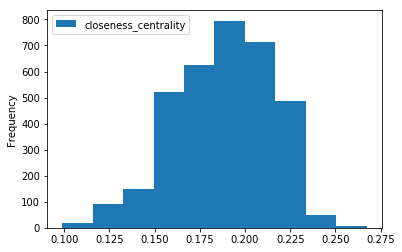

In [85]:
closeness_centrality_targets[['closeness_centrality']].plot.hist('closeness_centrality')

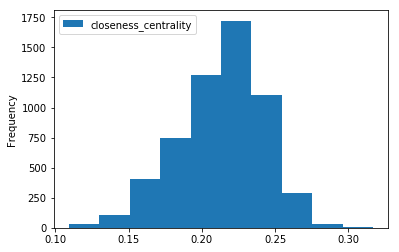

In [86]:
closeness_centrality_drugs[['closeness_centrality']].plot.hist('closeness_centrality')

In [87]:
closeness_centrality_drugs

,closeness_centrality,drug_name,drug_cas,bipartite
DB13144,0.109102,Lenograstim,135968-09-1,0
DB05249,0.109102,FavId,NaN,0
DB04234,0.109188,N2-({[(4-Bromophenyl)Methyl]Oxy}Carbonyl)-N1-[...,NaN,0
DB03405,0.109188,1-[N[(Phenylmethoxy)Carbonyl]-L-Leucyl-4-[[N/N...,NaN,0
DB08287,0.109188,"(1R,2R)-N-(2-AMINOETHYL)-2-{[(4-METHOXYPHENYL)...",NaN,0
...,...,...,...,...
DB02325,0.303822,Isopropyl Alcohol,67-63-0,0
DB08231,0.305740,MYRISTIC ACID,NaN,0
DB04272,0.309908,Citric Acid,77-92-9,0
DB00157,0.314907,NADH,58-68-4,0


In [111]:
## Serialized Implementation

v = []
u = []
path_delta = []

for edge in tqdm(drug_target_interactions_major.edges()):
    
    drug_target_interactions_major_temp = drug_target_interactions_major.copy()
    drug_target_interactions_major_temp.remove_edge(*edge)
    
    try:
        path_delta.append(nx.shortest_path(drug_target_interactions_major_temp, edge[0], edge[1]))
    except nx.NetworkXNoPath:
        path_delta.append(0)
    
    v.append(edge[0])
    u.append(edge[1])
    
    break

In [121]:
## Parallel implementation

def get_shortest_path_delta(args):
    
    drug_target_interactions_major = args[0]
    edge = args[1]
    
    drug_target_interactions_major_temp = drug_target_interactions_major.copy()
    drug_target_interactions_major_temp.remove_edge(*edge)
    
    try:
        return [nx.shortest_path(drug_target_interactions_major_temp,
                                edge[0], edge[1]), edge[0], edge[1]]
    except nx.NetworkXNoPath:
        return [[0],edge[0], edge[1]]

    
p = Pool(11)
shortest_path_delta = p.map(get_shortest_path_delta,
                            [[drug_target_interactions_major, e] for e in drug_target_interactions_major.edges()])

In [122]:
shortest_path_delta

[[['BE0000041', 'DB13149', 'BE0000216', 'DB13151'], 'BE0000041', 'DB13151'],
 [['BE0000041', 'DB13151', 'BE0000216', 'DB13149'], 'BE0000041', 'DB13149'],
 [['BE0000041', 'DB00055', 'BE0000048', 'DB05777'], 'BE0000041', 'DB05777'],
 [['BE0000041', 'DB13151', 'BE0000016', 'DB00055'], 'BE0000041', 'DB00055'],
 [0, 'DB02511', 'BE0001831'],
 [0, 'DB07836', 'BE0003997'],
 [0, 'BE0005841', 'DB00898'],
 [0, 'DB07369', 'BE0000915'],
 [0, 'BE0003282', 'DB04315'],
 [0, 'BE0000474', 'DB00548'],
 [0, 'DB08664', 'BE0001732'],
 [0, 'DB11365', 'BE0004136'],
 [['DB07859', 'BE0003762', 'DB08073', 'BE0001065'], 'DB07859', 'BE0001065'],
 [['DB07859', 'BE0001065', 'DB08073', 'BE0003762'], 'DB07859', 'BE0003762'],
 [['DB07859', 'BE0001065', 'DB08073', 'BE0003761'], 'DB07859', 'BE0003761'],
 [['DB07859', 'BE0001065', 'DB08073', 'BE0001172'], 'DB07859', 'BE0001172'],
 [0, 'DB08617', 'BE0000230'],
 [['BE0003585', 'DB09028', 'BE0003587', 'DB01273'], 'BE0003585', 'DB01273'],
 [['BE0003585', 'DB01273', 'BE0003587

In [128]:
shortest_path_delta = [[[p[0]], p[1], p[2]] if p[0] == 0 else p for p in shortest_path_delta ]
    

In [129]:
shortest_path_delta_df = pd.DataFrame(columns = ['path', 'node_1', 'node_2', 'path_len'])

In [135]:
shortest_path_delta_df['path'] = [p[0] for p in shortest_path_delta]
shortest_path_delta_df['node_1'] = [p[1] for p in shortest_path_delta]
shortest_path_delta_df['node_2'] = [p[2] for p in shortest_path_delta]
shortest_path_delta_df['path_len'] = [len(p[0]) for p in shortest_path_delta]

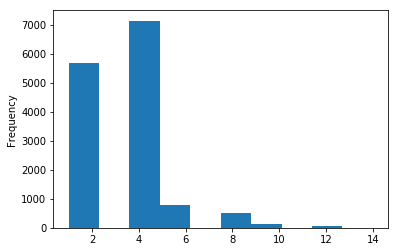

In [136]:
shortest_path_delta_df['path_len'].plot.hist()